In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
train_data = pd.read_csv('train (1).csv')

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
train_data = train_data.drop('id',axis=1)
#test_data = test_data.drop('id',axis=1)

In [9]:
train_data.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

In [10]:
## Segregating columns
num_col = ["Age","Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
cat_col = ["Gender","Driving_License", 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

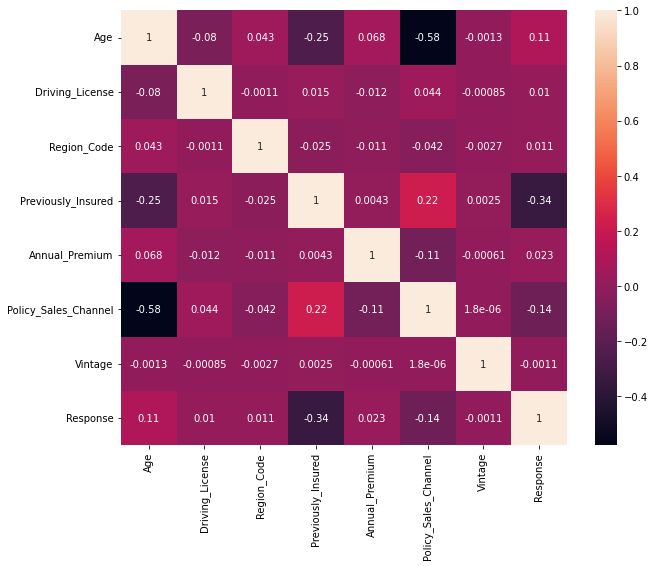

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

Observations
1. Previously insured, Policy Sales Channel and Age of customers have strong correlation to response.

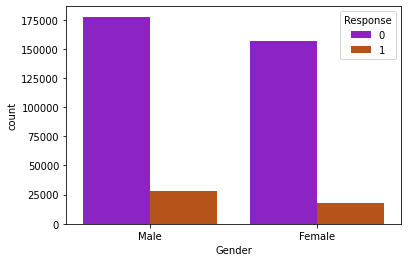

In [12]:
a1=sns.countplot(data=train_data,x='Gender',hue='Response',palette="gnuplot")

Looking at the training data, Response towards purchasing cross policy is slightly more from males than females. 

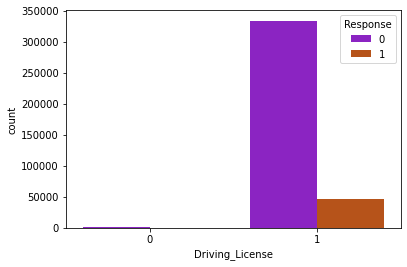

In [13]:
a1=sns.countplot(data=train_data,x='Driving_License',hue='Response',palette="gnuplot")

People who don't have license are not responding but with driving license only are responding

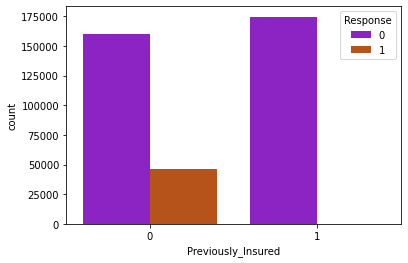

In [14]:
a1=sns.countplot(data=train_data,x='Previously_Insured',hue='Response',palette="gnuplot")

People who is not previously insured are responding, but who is already insured are not responding

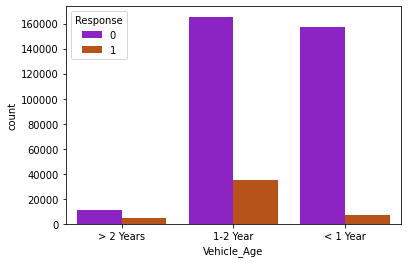

In [15]:
a1=sns.countplot(data=train_data,x='Vehicle_Age',hue='Response',palette="gnuplot")

People whose vehicle age is greater than 1 year are reasponding more frequently

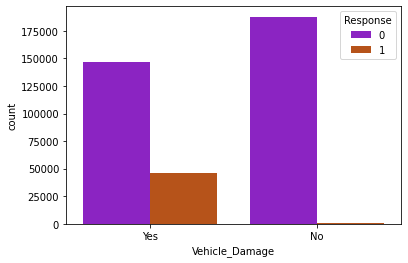

In [16]:
a1=sns.countplot(data=train_data,x='Vehicle_Damage',hue='Response',palette="gnuplot")

People whose Vehicle is Damaged are responding +ve

Exploring Numerical columns

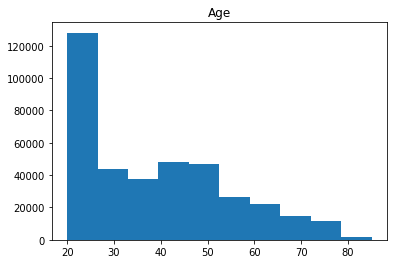

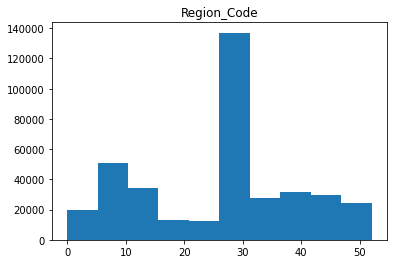

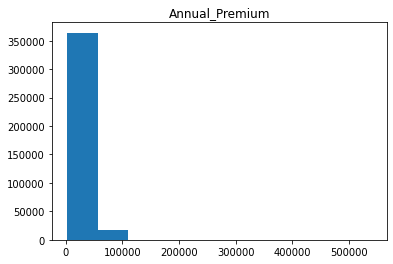

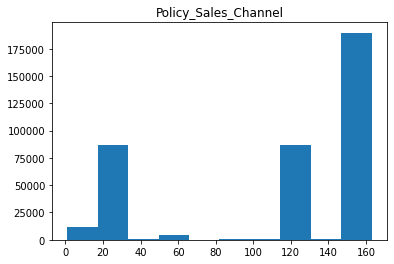

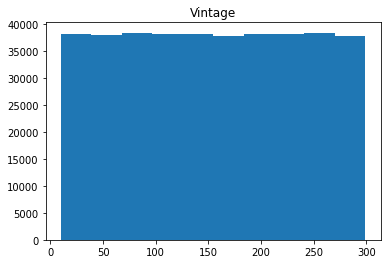

In [17]:
for i in num_col:
    plt.hist(train_data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='Response', ylabel='count'>

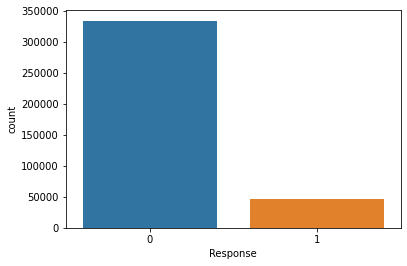

In [18]:
### Checking if the data is Balanced. 
sns.countplot(x = train_data["Response"])

The data is highly imbalanced. So We will use Synthetic Minority Oversampling Technique to balance the dataset.

# Finding Outliers

C:\Users\t.rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


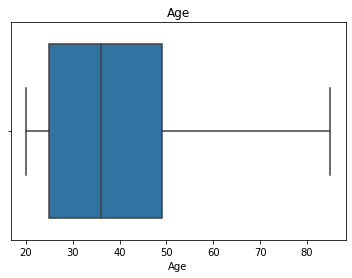

C:\Users\t.rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


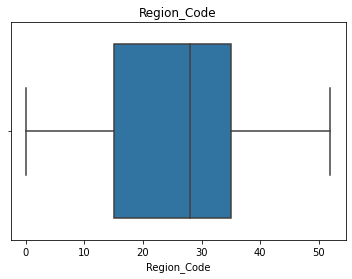

C:\Users\t.rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


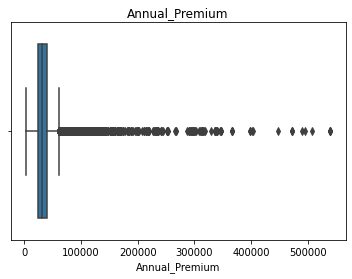

C:\Users\t.rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


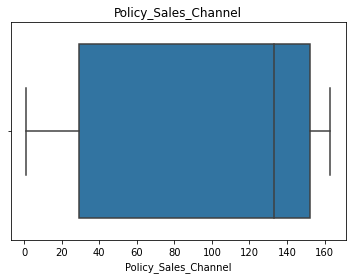

C:\Users\t.rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


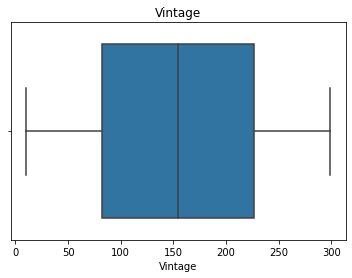

In [19]:
# dealing with outliers values
for i in num_col:
    sns.boxplot(train_data[i])
    plt.title(i)
    plt.show()

In [20]:
#Annual Premium Column
Q1=train_data.Annual_Premium.quantile(0.25)
Q3=train_data.Annual_Premium.quantile(0.75)
Q1,Q3

(24405.0, 39400.0)

In [21]:
IQR=Q3-Q1
IQR

14995.0

In [22]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(1912.5, 61892.5)

In [23]:
train_data[(train_data.Annual_Premium<lower_limit)|(train_data.Annual_Premium>upper_limit)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,Female,21,1,28,1,< 1 Year,No,61964,152,72,0
37,Female,25,1,28,1,< 1 Year,No,76251,152,107,0
67,Male,60,1,28,0,1-2 Year,Yes,66338,124,73,0
139,Male,21,1,29,1,< 1 Year,No,62164,152,116,0
149,Female,22,1,11,1,< 1 Year,No,76651,152,258,0
...,...,...,...,...,...,...,...,...,...,...,...
380959,Male,25,1,8,1,< 1 Year,No,61909,152,161,0
380998,Female,33,1,8,0,1-2 Year,Yes,101664,124,21,0
381035,Female,22,1,11,1,< 1 Year,No,62889,152,295,0
381047,Female,52,1,8,1,1-2 Year,No,71915,7,233,0


In [24]:
# dropping the outliers shall remove the data of people paying high premium which could play an important role in decision making.  
#data = train_data[(train_data['Annual_Premium']<61892) & (train_data['Annual_Premium']>1912)]

# Encoding Categorical Features

In [25]:
train_data = pd.get_dummies(train_data)

# Normalizing Numerical features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
data=pd.DataFrame(scaler.fit_transform(train_data),
            columns=train_data.columns, index=train_data.index) 

In [27]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0.369231,1.0,0.538462,0.0,0.070366,0.154321,0.716263,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.861538,1.0,0.057692,0.0,0.057496,0.154321,0.598616,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.415385,1.0,0.538462,0.0,0.066347,0.154321,0.058824,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.015385,1.0,0.211538,1.0,0.048348,0.932099,0.667820,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.138462,1.0,0.788462,1.0,0.046259,0.932099,0.100346,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1.0,0.500000,1.0,0.051234,0.154321,0.269896,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
381105,0.153846,1.0,0.711538,1.0,0.069551,0.932099,0.418685,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381106,0.015385,1.0,0.576923,1.0,0.060439,0.981481,0.522491,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381107,0.738462,1.0,0.269231,0.0,0.078110,0.759259,0.221453,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Feature Importance

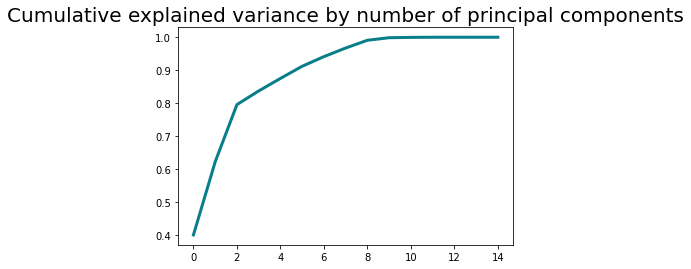

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

 90% of the variance in the dataset is explained with the first two principal components

In [29]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(data.columns) + 1)],
    index=data.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Age,0.139332,-0.035719,0.126665,-0.007590,0.003642,0.056962,0.004945,0.004938,0.047831,0.120672,-0.001255,-0.000346,-1.443121e-31,-3.540608e-34,1.101274e-34
Driving_License,-0.001625,0.000821,-0.001216,0.000907,-0.000133,-0.001367,-0.000188,-0.000065,-0.000034,-0.003627,-0.045884,0.000203,4.717839e-32,2.488023e-32,-6.878422e-34
Region_Code,0.011063,0.001370,0.007519,-0.001092,-0.001555,0.025204,-0.252676,-0.008039,0.000652,-0.000334,0.000016,0.000060,4.121692e-32,-2.185066e-32,2.026231e-33
Previously_Insured,-0.400889,-0.152546,0.152643,0.015957,0.000818,0.005284,-0.007427,0.201560,-0.001339,-0.002375,0.000016,-0.000096,-4.401767e-32,-2.674092e-32,-3.536972e-34
Annual_Premium,0.000619,-0.000174,0.000662,0.001151,0.000236,0.004187,0.000778,0.000789,-0.000669,0.001198,0.000279,0.031662,8.340789e-32,-2.720354e-32,-1.782399e-33


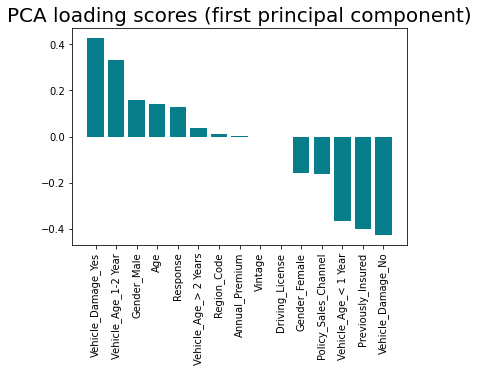

In [30]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0.369231,1.0,0.538462,0.0,0.070366,0.154321,0.716263,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.861538,1.0,0.057692,0.0,0.057496,0.154321,0.598616,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.415385,1.0,0.538462,0.0,0.066347,0.154321,0.058824,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.015385,1.0,0.211538,1.0,0.048348,0.932099,0.667820,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.138462,1.0,0.788462,1.0,0.046259,0.932099,0.100346,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1.0,0.500000,1.0,0.051234,0.154321,0.269896,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
381105,0.153846,1.0,0.711538,1.0,0.069551,0.932099,0.418685,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381106,0.015385,1.0,0.576923,1.0,0.060439,0.981481,0.522491,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381107,0.738462,1.0,0.269231,0.0,0.078110,0.759259,0.221453,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [32]:
pp_plot_data = data.drop(['Gender_Female','Gender_Male','Vehicle_Damage_No','Vehicle_Damage_No' ,'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

In [35]:
sns.pairplot(pp_plot_data, hue="Response", palette="husl");

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002C5398A9040> (for post_execute):


KeyboardInterrupt: 

If skewness is 0, the data are perfectly symmetrical
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.**

In [33]:
from scipy.stats import skew
print(skew(data['Age']))
print(skew(data['Annual_Premium']))
print(skew(data['Vintage']))
print(skew(data['Policy_Sales_Channel']))
print(skew(data['Region_Code']))

0.6725363506891476
1.766080263777901
0.003029504966164264
-0.9000045811808193
-0.11526596121061514


SO HERE WE SEE THAT "AGE" IS MODERATELY SKEWED AND "ANNUAL PREMIUM" IS HIGHLY SKEWED. SO WE NEED TO TREAT THEM AS WELL. REST ALL COLUMNS ARE NOT SKEWED**

Applying SQUARE ROOT TRANSFORM METHOD TO REMOVE IT

In [34]:
data["Age"] = np.sqrt(data["Age"])
print(skew(data['Age']))

0.055823316634182954


In [35]:
data["Annual_Premium"] = np.sqrt(data["Annual_Premium"])
print(skew(data['Annual_Premium']))

-1.124612020211832


In [36]:
test_data["Age"] = np.sqrt(test_data["Age"])
test_data["Annual_Premium"] = np.sqrt(test_data["Annual_Premium"])

In [37]:
from scipy.stats import skew
print(skew(data['Age']))
print(skew(data['Annual_Premium']))
print(skew(data['Vintage']))
print(skew(data['Policy_Sales_Channel']))
print(skew(data['Region_Code']))

0.055823316634182954
-1.124612020211832
0.003029504966164264
-0.9000045811808193
-0.11526596121061514


Feature Selection with hypothesis test
Chi-test 

In [38]:
ct = pd.crosstab(data['Vintage'],data['Response'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. Vintage and Response have Relationship")
else:
    print("Null hypothesis passed. Vintage and Response doesnot have  Relationship")

pvalue :  0.8862939415964791
Null hypothesis passed. Vintage and Response doesnot have  Relationship


In [50]:
train_data_1 = data.loc[:,['Response','Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel']]

KeyError: "['Gender', 'Vehicle_Age', 'Vehicle_Damage'] not in index"

In [49]:
train_data_1.replace(['Female','Male','1-2 Year','< 1 Year','> 2 Years'],[0,1,'1-2','<1Year','>2Years'],inplace=True)
test_data.replace(['Female','Male','1-2 Year','< 1 Year','> 2 Years'],[0,1,'1-2','<1Year','>2Years'],inplace=True)

NameError: name 'train_data_1' is not defined

In [41]:
#final_train_data = pd.get_dummies(train_data_1)

In [42]:
final_train_data = data

# Train Test Split

In [43]:
features = final_train_data.iloc[:,1:].values
labels = final_train_data.iloc[:,0].values


In [44]:
features

array([[1.        , 0.53846154, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.05769231, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.53846154, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.57692308, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.26923077, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.55769231, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [53]:
# X_train, X_test, y_train, y_test= train_test_split(features,labels, test_size= 0.25,stratify = final_train_data['Response'],random_state=101)
X = final_train_data.drop(labels=['Response'],axis=1)

# Data for the dependent variable
Y = final_train_data['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)


In [55]:
# print(final_train_data.head())


In [57]:
X, y  = smote.fit_resample(X_train, Y_train)


In [144]:
classimodel= LogisticRegression(solver='liblinear')  
classimodel.fit(X_train, y_train)
trainscore =  classimodel.score(X_train,y_train)
testscore =  classimodel.score(X_test,y_test)  


ValueError: Unknown label type: 'continuous'

In [295]:

y_predlogi =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predlogi),'\n')
print(confusion_matrix(y_test, y_predlogi))

 f1 score:  1.0 

[[45858     0]
 [    0 46839]]


In [296]:
print(' precision score: ',precision_score(y_test, y_predlogi),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi),'\n')
print(classification_report(y_test, y_predlogi))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45858
           1       1.00      1.00      1.00     46839

    accuracy                           1.00     92697
   macro avg       1.00      1.00      1.00     92697
weighted avg       1.00      1.00      1.00     92697



In [297]:
#------------------------------naive bayes---------------------------
X_train, X_test, y_train, y_test= train_test_split(features,labels, test_size= 0.25, random_state=94)

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)  

y_predNB =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNB),'\n')
print(confusion_matrix(y_test, y_predNB))

 f1 score:  0.9997961176508461 

[[46092    19]
 [    0 46586]]


In [298]:
print(' precision score: ',precision_score(y_test, y_predNB),'\n')
print(' recall score: ',recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

 precision score:  0.9995923184207703 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46111
           1       1.00      1.00      1.00     46586

    accuracy                           1.00     92697
   macro avg       1.00      1.00      1.00     92697
weighted avg       1.00      1.00      1.00     92697



In [299]:
#------------------------Decision Tree-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,labels, test_size= 0.25, random_state=34)

DTmodel=  DecisionTreeClassifier(criterion = 'entropy',splitter = 'random',max_depth=4)  
DTmodel.fit(X_train, y_train)
trainscore =  DTmodel.score(X_train,y_train)
testscore =  DTmodel.score(X_test,y_test)  

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  1.0 

[[46250     0]
 [    0 46447]]


In [300]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46250
           1       1.00      1.00      1.00     46447

    accuracy                           1.00     92697
   macro avg       1.00      1.00      1.00     92697
weighted avg       1.00      1.00      1.00     92697



In [301]:
#------------------------Random Forest-----------------------
X_train, X_test, y_train, y_test= train_test_split(features,labels, test_size= 0.25, random_state=2)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=4) 
RFmodel.fit(X_train, y_train)
trainscore =  RFmodel.score(X_train,y_train)
testscore =  RFmodel.score(X_test,y_test)  

y_pred =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  1.0 

[[46169     0]
 [    0 46528]]


In [302]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46169
           1       1.00      1.00      1.00     46528

    accuracy                           1.00     92697
   macro avg       1.00      1.00      1.00     92697
weighted avg       1.00      1.00      1.00     92697



Receiver Operating Characteristic Score (ROC AUC)
Logistic Regression (auc: 0.8118786282323492)
naive bayes (auc: 0.8214481948289034)
DecisionTreeClassifier (auc: 0.829889187907877)
RandomForestClassifier (auc: 0.845225109832536)

1.0


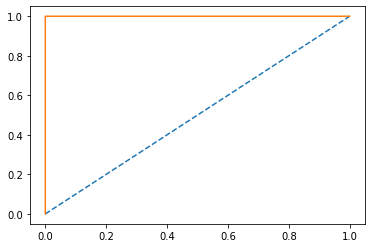

In [303]:
#-------------------------------------- LogisticRegression -------------------------------------
probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(labels,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(labels,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.9999999984288344


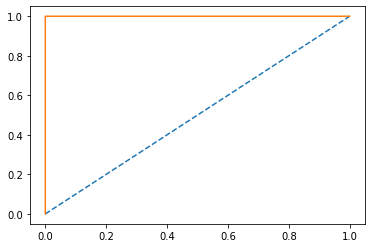

In [304]:
#-------------------------------------- naive bayes -------------------------------------
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(labels,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(labels,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

1.0


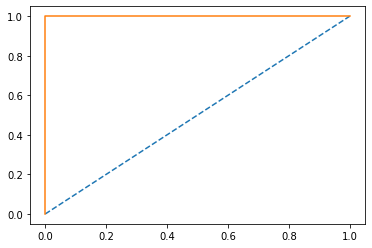

In [305]:
#-------------------------------------- Decision Tree -------------------------------------
probabilityValues = DTmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(labels,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(labels,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.9999999999999999


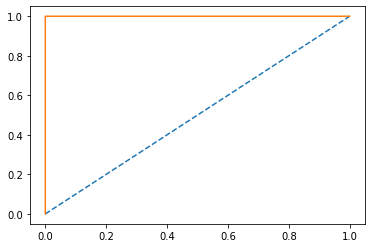

In [306]:
#-------------------------------------- Random Forest -------------------------------------
probabilityValues = RFmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(labels,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(labels,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

Conclusion
I will choose a naive bayes algorithm for this dataset.

naive bayes score

f1_score: 0.4182915181587346
auc: 0.8214481948289034

Applying Algorithm
we have to separet relational columns from the test dataset that will be columns assign to a new dataset.
now we are ready for applying the decision tree algorithm on the test dataset.
now we have model-predicted prices and we can assign a price column to the test dataset.

In [307]:
finaltestdata = test_data.loc[:,['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel']]

In [308]:
final_test_data = pd.get_dummies(finaltestdata)

In [309]:
final_test_data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vehicle_Age_1-2',
       'Vehicle_Age_<1Year', 'Vehicle_Age_>2Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [310]:
Response = NBmodel.predict(final_test_data)

X has feature names, but GaussianNB was fitted without feature names


In [311]:
len(Response)

127037

In [312]:
test_data.shape

(127037, 11)

In [313]:
test_data['Response'] = Response

In [314]:
submission = test_data.loc[:,['id','Response']]

In [315]:
submission

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,1
4,381114,0
...,...,...
127032,508142,0
127033,508143,1
127034,508144,0
127035,508145,0


``multivariate`` option is an experimental feature. The interface can change in the future.



          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Encoding Features [*]

Preprocessing Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Trained Successfully [ ✓ ]

Evaluating Model Performance [*]

        Validation Accuracy is : 87.69 %
        KFold Accuracy: 87.85 %
        Standard Deviation: 0.00 % 



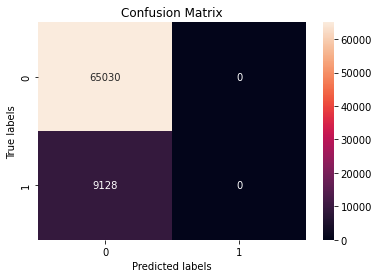

Model Evaluation Completed [ ✓ ]

Completed LuciferML Run [ ✓ ]

Time Elapsed :  6.17 seconds 



In [33]:
from luciferml.supervised.classification import Classification
from luciferml.preprocessing import Preprocess as prep

params = {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
classifier =  Classification(predictor = 'lr',params=params, lda = 'y')
classifier.fit(features, labels)
result = classifier.result()
accuracy_scores[result['Classifier']] = result['Accuracy']